In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('credit_card_fixed.csv')

In [3]:
df.head()

,have_credit_card,card_no,user_id,user_gender,user_age,user_city,total_amount,card_delivery_date
0,Yes,9871326599442434,1,Female,51,Edirne,3466,2022-01-03
1,Yes,5866643196858919,2,Male,33,İstanbul,2770,2022-01-22
2,Yes,5934969821915385,4,Female,45,İzmir,3990,2022-01-29
3,Yes,4583682992593297,5,Female,33,İstanbul,1876,2022-02-18
4,Yes,9834784352689854,6,Male,41,Ankara,4797,2022-02-07


In [4]:
df.shape

(451, 8)

In [5]:
df.describe()

,card_no,user_id,user_age,total_amount
count,4.510000e+02,451.000000,451.000000,451.000000
mean,5.574467e+15,249.853659,37.935698,3548.472284
std,2.631093e+15,144.039611,11.903233,1651.923984
min,1.112777e+15,1.000000,18.000000,725.000000
25%,3.377820e+15,122.500000,28.000000,2154.500000
50%,5.497366e+15,253.000000,37.000000,3295.000000
75%,7.849892e+15,374.500000,48.500000,4661.500000
max,9.982414e+15,500.000000,59.000000,8555.000000


In [6]:
df.groupby('user_city').agg({'user_age': 'mean'})

,user_age
user_city,
Amasya,37.605263
Ankara,37.416667
Antalya,40.146341
Bursa,40.523810
Edirne,38.742857
Kocaeli,37.382353
İstanbul,36.868852
İzmir,37.558140


In [7]:
df.groupby('user_city').agg({'user_age': 'min'})

,user_age
user_city,
Amasya,18
Ankara,18
Antalya,18
Bursa,20
Edirne,18
Kocaeli,18
İstanbul,18
İzmir,20


In [8]:
df.groupby('user_gender').agg({'user_age': 'mean'})

,user_age
user_gender,
Female,38.252174
Male,37.606335


In [9]:
df.groupby('user_city').agg({'total_amount': 'mean'})

,total_amount
user_city,
Amasya,3236.657895
Ankara,3815.385417
Antalya,3715.487805
Bursa,3426.214286
Edirne,3576.371429
Kocaeli,3302.647059
İstanbul,3453.893443
İzmir,3628.302326


In [10]:
df.groupby('user_city').agg({'total_amount': 'mean'}).reset_index()

,user_city,total_amount
0,Amasya,3236.657895
1,Ankara,3815.385417
2,Antalya,3715.487805
3,Bursa,3426.214286
4,Edirne,3576.371429
5,Kocaeli,3302.647059
6,İstanbul,3453.893443
7,İzmir,3628.302326


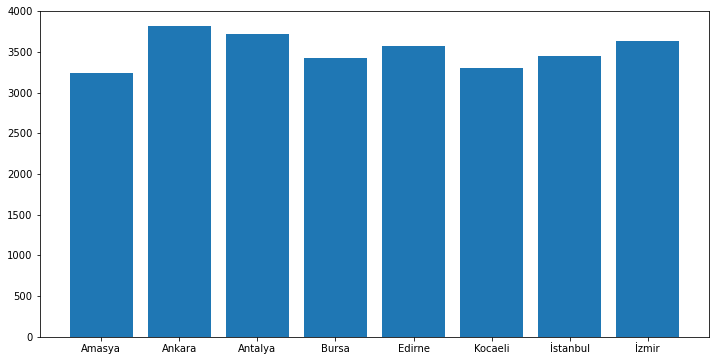

In [11]:
plt.figure(figsize = (12, 6))

plt.bar(data = df.groupby('user_city').agg({'total_amount': 'mean'}).reset_index(),
        x = 'user_city',
        height = 'total_amount')

plt.show()

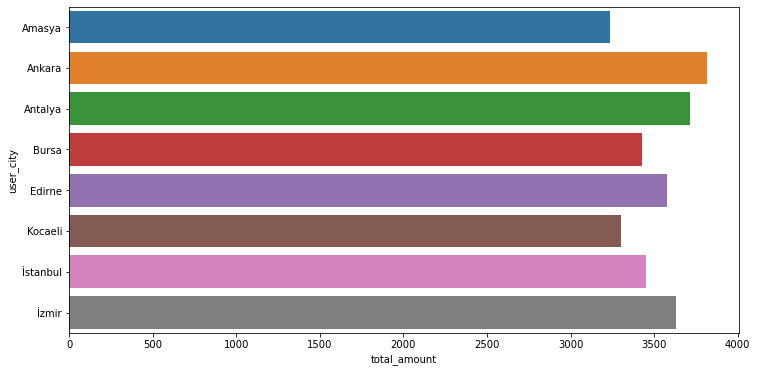

In [12]:
plt.figure(figsize = (12, 6))

sns.barplot(data = df.groupby('user_city').agg({'total_amount': 'mean'}).reset_index(),
           y = 'user_city',
           x = 'total_amount')

plt.show()

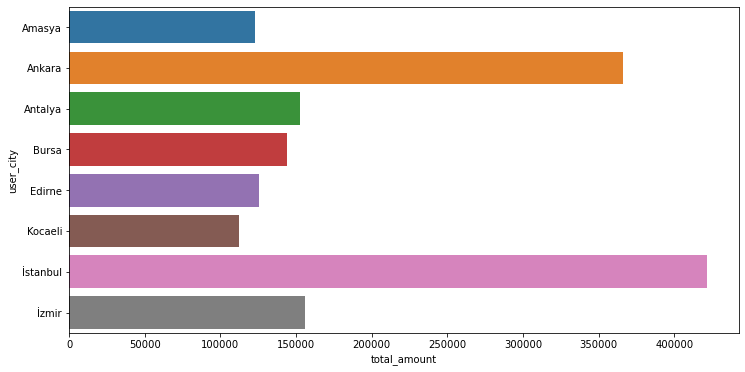

In [13]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df.groupby('user_city').agg({'total_amount': 'sum'}).reset_index(),
           y = 'user_city',
           x = 'total_amount')

plt.show()

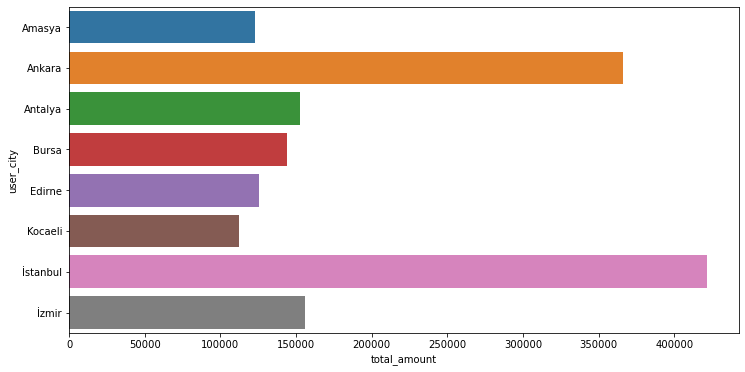

In [14]:
plt.figure(figsize = (12, 6))
sns.barplot(data = df.groupby('user_city').agg({'total_amount': 'sum'}).reset_index(),
           y = 'user_city',
           x = 'total_amount')

plt.show()

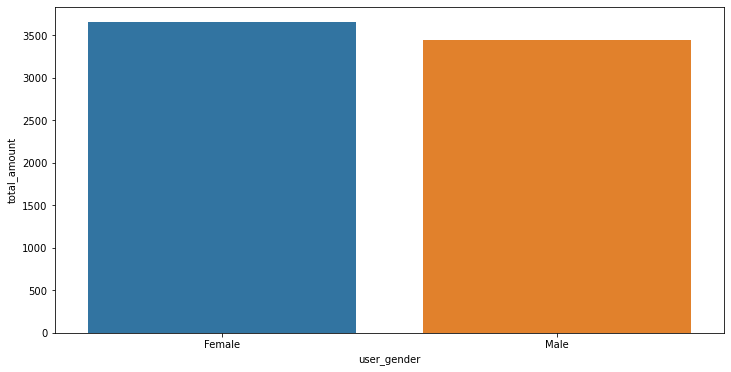

In [15]:
plt.figure(figsize = (12, 6))

sns.barplot(data = df.groupby('user_gender').agg({'total_amount': 'mean'}).reset_index(),
           x = 'user_gender',
           y = 'total_amount')

plt.show()

In [16]:
df.groupby('user_city').agg({'user_id': 'count'}).reset_index()

,user_city,user_id
0,Amasya,38
1,Ankara,96
2,Antalya,41
3,Bursa,42
4,Edirne,35
5,Kocaeli,34
6,İstanbul,122
7,İzmir,43


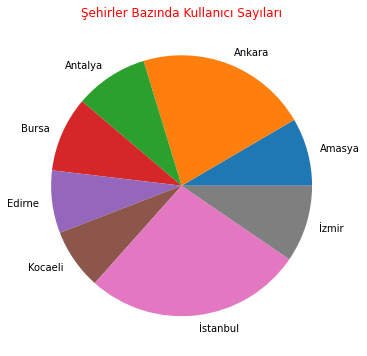

In [17]:
plt.figure(figsize = (12, 6))

plt.pie(data = df.groupby('user_city').agg({'user_id': 'count'}).reset_index(),
        x = 'user_id',
       labels = 'user_city')

plt.title('Şehirler Bazında Kullanıcı Sayıları', size = 12, color = 'red')

plt.show()

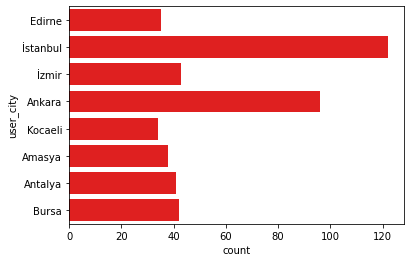

In [18]:
sns.countplot(data = df,
             y = 'user_city',
             color = 'red'
#               palette = 'Set2'
             )

plt.show()

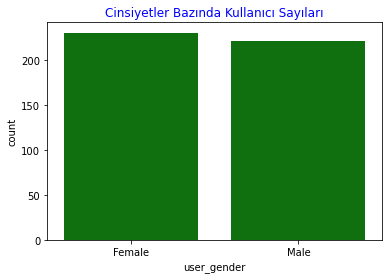

In [19]:
sns.countplot(data = df,
              x = 'user_gender',
             color = 'Green')

plt.title('Cinsiyetler Bazında Kullanıcı Sayıları', size = 12, color = 'blue')

plt.show()

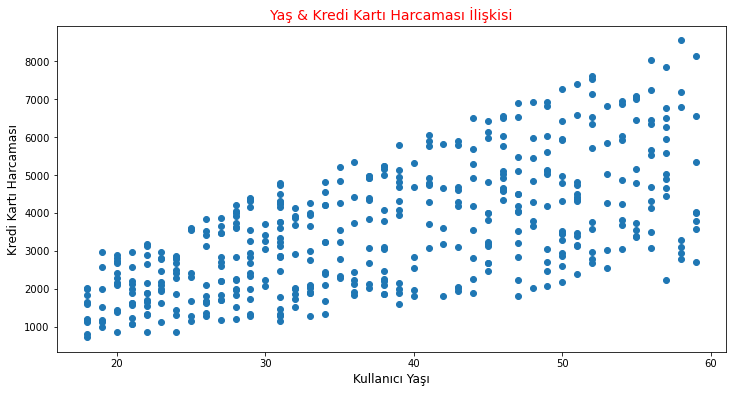

In [20]:
plt.figure(figsize = (12, 6))

plt.scatter(data = df,
            x = 'user_age',
            y = 'total_amount')

plt.xlabel('Kullanıcı Yaşı', size = 12)

plt.ylabel('Kredi Kartı Harcaması', size = 12)

plt.title('Yaş & Kredi Kartı Harcaması İlişkisi', size = 14, color = 'red')

plt.show()

In [21]:
df['card_delivery_date'] = pd.to_datetime(df['card_delivery_date'])

In [22]:
card_df = df.groupby('card_delivery_date').agg({'user_id': 'count'}).reset_index()

In [23]:
card_df.head()

,card_delivery_date,user_id
0,2022-01-01,12
1,2022-01-02,4
2,2022-01-03,10
3,2022-01-04,8
4,2022-01-05,7


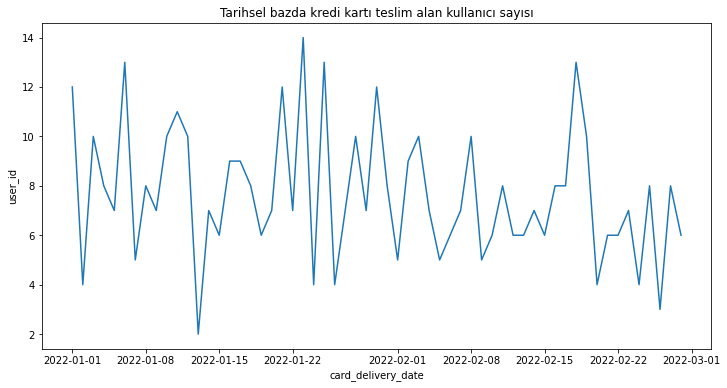

In [24]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = card_df,
            x = 'card_delivery_date',
            y = 'user_id')

plt.title('Tarihsel bazda kredi kartı teslim alan kullanıcı sayısı', size = 12)
plt.show()

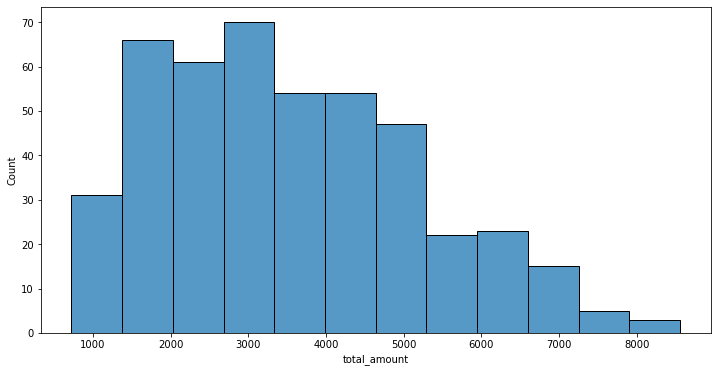

In [25]:
plt.figure(figsize = (12, 6))
sns.histplot(data = df,
            x = 'total_amount')

plt.show()

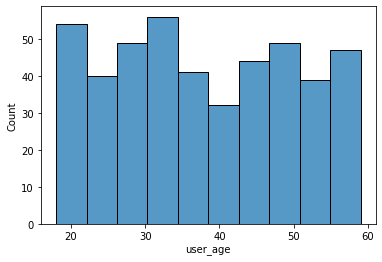

In [26]:
sns.histplot(data = df, x = 'user_age')

plt.show()

In [27]:
!pip install plotly

In [37]:
import plotly.graph_objs as go

from plotly.offline import iplot

In [38]:
bar_df = df.groupby('user_city').agg({'total_amount': 'sum'}).reset_index()

In [39]:
bar = go.Bar(
             x = bar_df['user_city'],
             y = bar_df['total_amount']
            )

fig = go.Figure(data = bar)

iplot(fig)

In [40]:
scatter = go.Scatter(x = df['user_age'],
                     y = df['total_amount'],
                     mode = 'markers'
          )

fig = go.Figure(data = scatter)

iplot(fig)

In [41]:
scatter = go.Scatter(x = df['user_age'],
                     y = df['total_amount'],
                     mode = 'markers',
                     marker = dict(size = 8,
                                   color = 'blue',
                                   opacity = 0.65)
          )

layout = go.Layout(title = dict(text = 'Kullanıcı Yaşı & Toplam Harcama İlişkisi'),
                   xaxis = dict(title = 'Yaş'),
                   yaxis = dict(title = 'Toplam Harcama'))



fig = go.Figure(data = scatter, layout = layout)

iplot(fig)

In [42]:
male = df.loc[df['user_gender'] == 'Male']
female = df.loc[df['user_gender'] == 'Female']

male_scatter = go.Scatter(x = male['user_age'],
                          y = male['total_amount'],
                          mode = 'markers',
                          name = 'Male'
                         )

female_scatter = go.Scatter(x = female['user_age'],
                            y = female['total_amount'],
                            mode = 'markers',
                            name = 'Female'
                         )

gender_layout = go.Layout(title = dict(text = 'Cinsiyetler Bazında Yaş & Toplam Harcama Tutarı'),
                          xaxis = dict(title = 'Yaş'),
                          yaxis = dict(title = 'Toplam Harcama'),
                         
                         template = 'plotly_dark') 

fig = go.Figure(data = [male_scatter, female_scatter], layout = gender_layout)

iplot(fig)

In [43]:
from plotly.subplots import make_subplots

In [ ]:
a = int(input('SAYI GİRİNİZ: '))

In [ ]:
city = str(input('ŞEHİR GİRİNİZ: '))

print(city)

In [ ]:
def şehir_analizi():
    
    city = str(input('Şehir giriniz: '))
    
    if city not in df['user_city'].unique():
        
        print('Girdiğiniz şehir veri setinde mevcut değil :(')
        
    else:
    
        city_data = df.loc[df['user_city'] == city]
        
        bar_df = city_data.groupby('user_gender').agg({'total_amount': 'mean'}).reset_index()
        
        fig = make_subplots(rows = 1,
                            cols = 2,
                            subplot_titles = ['Cinsiyetler bazında ortalama tüketim',
                                              'Yaş & Tüketim İlişkisi'])
        
        fig.add_trace(go.Bar(x = bar_df['user_gender'],
                             y = bar_df['total_amount'],
                             showlegend = False),
                      
                      row = 1, col = 1)
        
        fig.add_trace(go.Scatter(x = city_data['total_amount'],
                                y = city_data['user_age'],
                                showlegend = False,
                                mode = 'markers'),
                     
                     row = 1, col = 2)
        
        fig.update_layout(title = dict(text = city + ' Kredi Kartı Tüketim Analizi',
                                      x = 0.5),
                         xaxis = dict(title = 'Cinsiyet'),
                         yaxis = dict(title = 'Toplam Harcama'),
                         xaxis2 = dict(title = 'Toplam Harcama'),
                         yaxis2 = dict(title = 'Yaş'),
                         template = 'plotly_dark')
        
        iplot(fig)